# Multi-axis figure homework

In this homework, you'll make a simulated data set with a relationship between x and y, then make a "correlation plot" of the data.

A correlation plot of data values is a matrix of subplots with one row and one column corresponding to each variable. The main diagonal has histograms of the variable corresponding to that row and column. In one type of correlation plot, the lower triangle of the matrix has plots of the variables against one another, and the upper triangles shows the correlations between the variables.

Like in the image in corrPlot.png ![corr plot](./images/corrPlot.png), which shows an example.

## Make your data

Make some y vs. x data like in the last homework. It can be straight line based (like y = m*x * b * random noise), or it can be something more exotic (like y = x^3 + random noise). 

Play around with the amount of noise, the number of data points, etc., plotting as you go until you have data that you are happy with.

Numpy has a handy function to compute the ***corr***elation ***coef***icient.

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [103]:
# make x and y data
np.random.seed(0)
x = np.linspace(0, 10, 100)
y = x**3

# random noise
y_noise = y + np.random.normal(0,45,100)

# compute correlation coefficient
corr_coeff = np.corrcoef(x, y_noise)[0, 1]

# fit regression model
coeffs = np.polyfit(x, y_noise, 3)
p = np.poly1d(coeffs)

## Make your figure

Because you have 2 variables, your figure will be a 2x2 matrix of subplots, with two histograms down the main diagonal, a scatterplot in the lower left, and a correlation value in the plot in the upper right.

But feel free to make it your own. For example, the upper right cell could have a faint re-plot of the data with the correlation value shown on top of it.

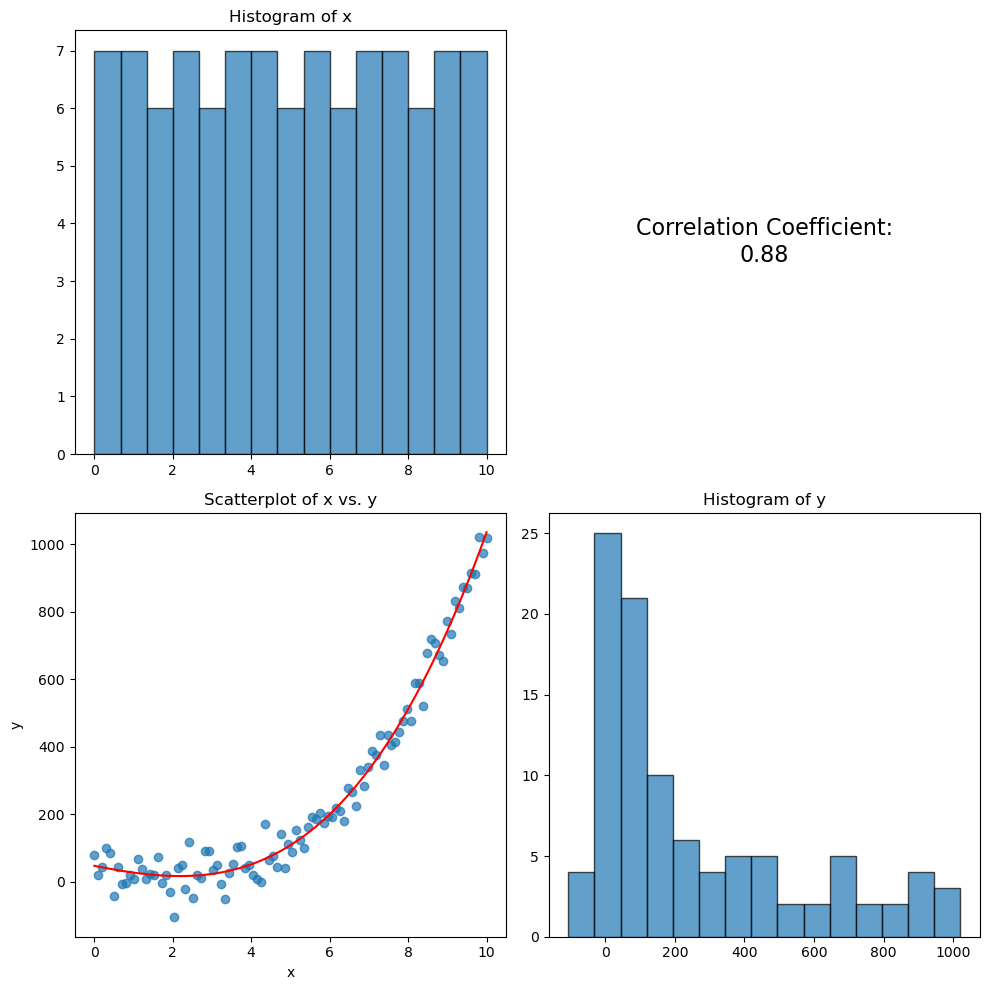

In [104]:
# subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# histograms, main diagonal
axs[0, 0].hist(x, bins=15, edgecolor='black', alpha=0.7)
axs[1, 1].hist(y_noise, bins=15, edgecolor='black', alpha=0.7)

# scatterplot, lower left
axs[1, 0].scatter(x, y_noise, alpha=0.7)
axs[1, 0].plot(x, p(x), color='red')
axs[1, 0].set_xlabel('x')
axs[1, 0].set_ylabel('y')

# correlation value, upper right
axs[0, 1].text(0.5, 0.5, f'Correlation Coefficient:\n{corr_coeff:.2f}',
               horizontalalignment='center', verticalalignment='center', fontsize=16, transform=axs[0, 1].transAxes)
axs[0, 1].axis('off')

# title and labels
axs[0, 0].set_title('Histogram of x')
axs[1, 1].set_title('Histogram of y')
axs[1, 0].set_title('Scatterplot of x vs. y')

plt.tight_layout()
plt.show()